<a href="https://colab.research.google.com/github/hueyqing/LIN373_Project_SentimentAnalysis/blob/master/SentimentAnalysis_MovieReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sentiment Analysis of Text for Moview Review Prediction
Project by: Group 8, Tan Huey Qing [ ht7627 ] & Sarang Rastogi [ sr45936 ]<br><br>
__GOAL:__<br>
To be able to predict the sentiment of movie reviews as accurately as possible<br><br>
__WHAT IS SENTIMENT ANALYSIS?__<br>
Sentiment Analysis can be defined as the process of computationally determining whether a piece of writing is positive, negative, neutral etc. In context of speech it can be coined as ‘opinion mining’ to derive the opinion or attitude of a speaker. <br><br>
__DATA/ RESOURCES:__<br>
We have chosen the IMDB dataset of 50k movie reviews from here:<br>
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews#IMDB%20Dataset.csv<br><br>
__MACHINE LEARNING ALGORITHMS/ MODELS:__<br>
To study the correlation between the sentiment analysis results and movie review sentiment prediction, we aim to implement algorithms of Naive Bayes, logistic Regression and SVMs depending on the trend the factor we choose displays and find the best model.<br><br>
__ACCURACY/ EVALUATION:__
We aim to find the accuracy of our sentiment analysis using k-fold cross validation and analysing the accuracy of predictions using multiple classifiers such as neural networks and ensemble methods. 

# 1. Load Data & General Preprocessing

In [16]:
%%time
## LOAD DATA & CONVERT POS/NEG TO 1/0
import pandas as pd

# from sklearn.datasets import load_files
# load data using sklearn.datasets.load_files
# dataset = load_files("IMDB_Dataset.csv")

df = pd.read_csv('IMDB_Dataset.csv')
df["review"] = df["review"].str.lower()
print(df.head())

for row in range (len(df)):
    if (df['sentiment'].iloc[row] == 'positive'):
        df['sentiment'].iloc[row] = 1
    else:
        df['sentiment'].iloc[row] = 0 
print (df.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive
                                              review  sentiment
0  one of the other reviewers has mentioned that ...          1
1  a wonderful little production. <br /><br />the...          1
2  i thought this was a wonderful way to spend ti...          1
3  basically there's a family where a little boy ...          0
4  petter mattei's "love in the time of money" is...          1
CPU times: user 1min 24s, sys: 813 ms, total: 1min 25s
Wall time: 1min 31s


# 2. Preprocess Data with Train Test Split & Count Vectorizer
This is to be used for Naive Bayes and Logistic Regression

In [26]:
%%time
## PROCESS DATA FOR NB & LR WITH TRAIN TEST SPLIT & VECTORIZER

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

text_data = df.drop(['sentiment'], axis = 1)
# print (text_data)
labels = df.drop(['review'], axis = 1)
# print (labels)
docs_train, docs_test, y_train, y_test = train_test_split(text_data, labels, test_size = 0.2, random_state = 1000)
# print (docs_train)

# vectorize the training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(docs_train.review)
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names()[:1000])
print(X_train[0])

93033
['00', '000', '0000000000001', '00000001', '00001', '00015', '000dm', '000s', '001', '003830', '006', '0069', '007', '0079', '007s', '0080', '0083', '009', '00am', '00o', '00pm', '00s', '00schneider', '01', '0126', '0148', '01pm', '02', '0230', '03', '039', '04', '041', '044', '05', '050', '06', '0615', '06th', '07', '07b', '08', '089', '08th', '09', '0and', '0f', '0ne', '0r', '0tt', '10', '100', '1000', '10000', '1000000', '10000000000', '10000th', '1000s', '1000th', '1001', '1004', '100b', '100bt', '100ft', '100ibs', '100k', '100m', '100min', '100mins', '100mph', '100s', '100th', '100times', '100x', '100yards', '101', '101st', '102', '102nd', '103', '104', '1040', '1040a', '1040s', '105', '105lbs', '106', '107', '108', '1080', '1080p', '109', '10_', '10am', '10k', '10lines', '10mil', '10mins', '10minutes', '10p', '10pm', '10s', '10star', '10th', '10x', '10yo', '10yrs', '11', '110', '1100', '11001001', '1100ad', '110min', '110mph', '111', '112', '113', '1138', '113min', '113minu

 ### 2.1 Generate Naive Bayes  Model

In [27]:
%%time
## NAIVE BAYES MODEL WITH SINGLE TRAIN/TEST/SPLIT
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# REMEMBER to test out different parameters
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# vectorize the test data and predict 
X_test = vectorizer.transform(docs_test.review)
print(np.shape(X_test))
y_hat_nb = nb_model.predict(X_test)
print ('y_hat_nb')
print (y_hat_nb)
probs = []
probs = nb_model.predict_proba(X_test)
print ('probs')
print (probs)
# get accuracy score
accuracy_score_nb = metrics.accuracy_score(y_test, y_hat_nb)

# print out some data
print("nb_model accuracy is : ", accuracy_score_nb)
print("classification report:\n", metrics.classification_report(y_test, y_hat_nb))

print(np.shape(X_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(10000, 93033)
y_hat_nb
[0 0 0 ... 1 0 0]
probs
[[1.00000000e+00 4.30306061e-32]
 [5.17475500e-01 4.82524500e-01]
 [1.00000000e+00 3.00644882e-17]
 ...
 [5.84544670e-05 9.99941546e-01]
 [9.96036921e-01 3.96307866e-03]
 [1.00000000e+00 1.76997209e-23]]
nb_model accuracy is :  0.8415
classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      5054
           1       0.86      0.81      0.83      4946

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

(10000, 93033)
CPU times: user 2 s, sys: 60.8 ms, total: 2.06 s
Wall time: 1.93 s


Area:  0.9140351330579198


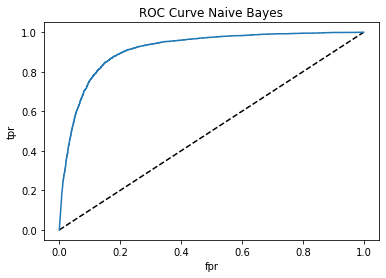

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
'''mat = confusion_matrix(X_train, y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');'''
probs1 = []
fpr, tpr = [], []
for i in range (0, len(probs)):
    probs1.append(probs[i][1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs1)
score = metrics.roc_auc_score(y_test, probs1)
print ("Area: ", score)

# Plotting ROC 
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

In [20]:
## NAIVE BAYES MODEL WITH K-FOLD CROSS VALIDATION

from sklearn.model_selection import cross_val_score

nb_xval_model = MultinomialNB()
X = vectorizer.fit_transform(df.review)
y = df.sentiment
nb_xval_scores = cross_val_score(nb_xval_model, X,y, cv=10)

print("Accuracy for Naive Bayes: %0.4f (+/- %0.4f)" % (nb_xval_scores.mean(), nb_xval_scores.std() * 2))

Accuracy for Naive Bayes: 0.8499 (+/- 0.0062)


 ### 2.2 Generate Logistic Regression Model

In [30]:
%%time
## GENERATE LOGISTIC REGRESSION MODEL WITH SKLEARN
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

text_data = df.drop(['sentiment'], axis = 1)
# print (text_data)
labels = df.drop(['review'], axis = 1)
# print (labels)
docs_train, docs_test, y_train, y_test = train_test_split(text_data, labels, test_size = 0.2, random_state = 1000)
# print (docs_train)

# vectorize the training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(docs_train.review)
# REMEMBER to test out different parameters
lr_model = LogisticRegression(solver = 'saga')
lr_model.fit(X_train, y_train)

# vectorize the test data and predict 
X_test = vectorizer.transform(docs_test.review)
# I HAD TO COMMENT THE LINE ABOVE BECAUSE IT CAUSED AN ERROR I DO NOT KNOW WHY ITS LITERALLY THE SAME AS THE NB ONE.....
# 4TGLHURIGHWGWOGREIP UGHHHHHHHHHHHHHH

y_hat_lr = lr_model.predict(X_test)
probs_lr = []
probs_lr = lr_model.predict_proba(X_test)
# get accuracy score
accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)

# print out some data
print("lr_model accuracy is : ", metrics.accuracy_score(y_test, y_hat_lr))
print("classification report:\n", metrics.classification_report(y_test, y_hat_lr))



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


lr_model accuracy is :  0.8816
classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5054
           1       0.87      0.89      0.88      4946

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

CPU times: user 16.9 s, sys: 263 ms, total: 17.1 s
Wall time: 17.1 s


Area:  0.9467108643552185


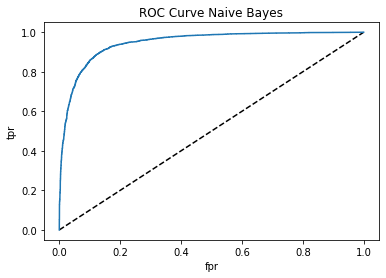

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
'''mat = confusion_matrix(X_train, y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');'''
probs1_lr = []
fpr, tpr = [], []
for i in range (0, len(probs_lr)):
    probs1_lr.append(probs_lr[i][1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs1_lr)
score = metrics.roc_auc_score(y_test, probs1_lr)
print ("Area: ", score)

# Plotting ROC 
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

In [29]:
## LOGISTIC REGRESSION MODEL WITH K-FOLD CROSS VALIDATION
# Try different parameters
lr_xval_model = LogisticRegression(random_state = 3, solver = 'saga')
X = vectorizer.fit_transform(df.review)
y = df.sentiment
lr_xval_scores = cross_val_score(lr_xval_model, X,y, cv=10)

print("Accuracy for Logistic Regression: %0.4f (+/- %0.4f)" % (lr_xval_scores.mean(), lr_xval_scores.std() * 2))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for Logistic Regression: 0.8834 (+/- 0.0081)


In [8]:
# pip install smart-open==1.9.0
# do we still need this?

# 3. Learn Word Embeddings with Word2Vec
To make NN & SVM

In [9]:
%%time
## PREPROCESS DATA FOR WORD2VEC

import nltk
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import STOPWORDS

sentList = []
for review in df[:50000]["review"]:
    sentences = nltk.sent_tokenize(review)
    str1 = ''.join(sentences)
    sentences = preprocess_string(str1)
    sentList.append(sentences)

"""  
from nltk.stem.porter import *
from gensim.utils import simple_preprocess
words = []
for mylist in sentList:    
    for myword in mylist:
        words.append(myword)
print(words)
print("\n")
for review in df[:100]["review"]:
    sentences = nltk.sent_tokenize(review)   
print(sentences)
for review in df[:10]["review"]:
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
        tokenized.append(nltk.word_tokenize(sentence))
for mylist in tokenized:    
    for myword in mylist:
        words.append(myword)
#print(words)
stemmer = PorterStemmer()
stems = [stemmer.stem(w) for w in words]
print(' '.join(stems))
"""

Wall time: 1min 39s


'  \nfrom nltk.stem.porter import *\nfrom gensim.utils import simple_preprocess\nwords = []\nfor mylist in sentList:    \n    for myword in mylist:\n        words.append(myword)\nprint(words)\nprint("\n")\nfor review in df[:100]["review"]:\n    sentences = nltk.sent_tokenize(review)   \nprint(sentences)\nfor review in df[:10]["review"]:\n    sentences = nltk.sent_tokenize(review)\n    for sentence in sentences:\n        tokenized.append(nltk.word_tokenize(sentence))\nfor mylist in tokenized:    \n    for myword in mylist:\n        words.append(myword)\n#print(words)\nstemmer = PorterStemmer()\nstems = [stemmer.stem(w) for w in words]\nprint(\' \'.join(stems))\n'

In [27]:
%%time
## GENERATE WORD2VEC MODEL

from gensim.models import Word2Vec

#corpus_text = '\n'.join(df[:50000]['review'])
#sentences = corpus_text.split('\n')
#sentences = [line.lower().split(' ') for line in sentences]

model = Word2Vec(sentList, size=100,  min_count=1) 
# change min count later
# print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

# save model for later in binary format to save space.
model.save('model.bin')
# print(model)

# to review embedded vector for a specific token:
# print(model.wv[<<INSERT TOKEN>>])

['review', 'mention', 'watch', 'episod', 'hook', 'right', 'exactli', 'happen', 'thing', 'struck', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'word', 'trust', 'faint', 'heart', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'hardcor', 'classic', 'us', 'call', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'home', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'far', 'awai', 'main', 'appeal', 'fact', 'goe', 'show', 'wouldn', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'charm', 'romanc', 'mess', 'saw', 'nasti', 'surreal', 'couldn', 'readi', 'develop', 'tast', 'got', 'accustom', 'level', 'graphic', 'injustic', 'crook', 'guard', 'sold', 'nickel', 'inmat', 'kill', 'order', 'manner', 'middl', '


Wall time: 37.6 s


Word2Vec(vocab=72299, size=100, alpha=0.025)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/bac

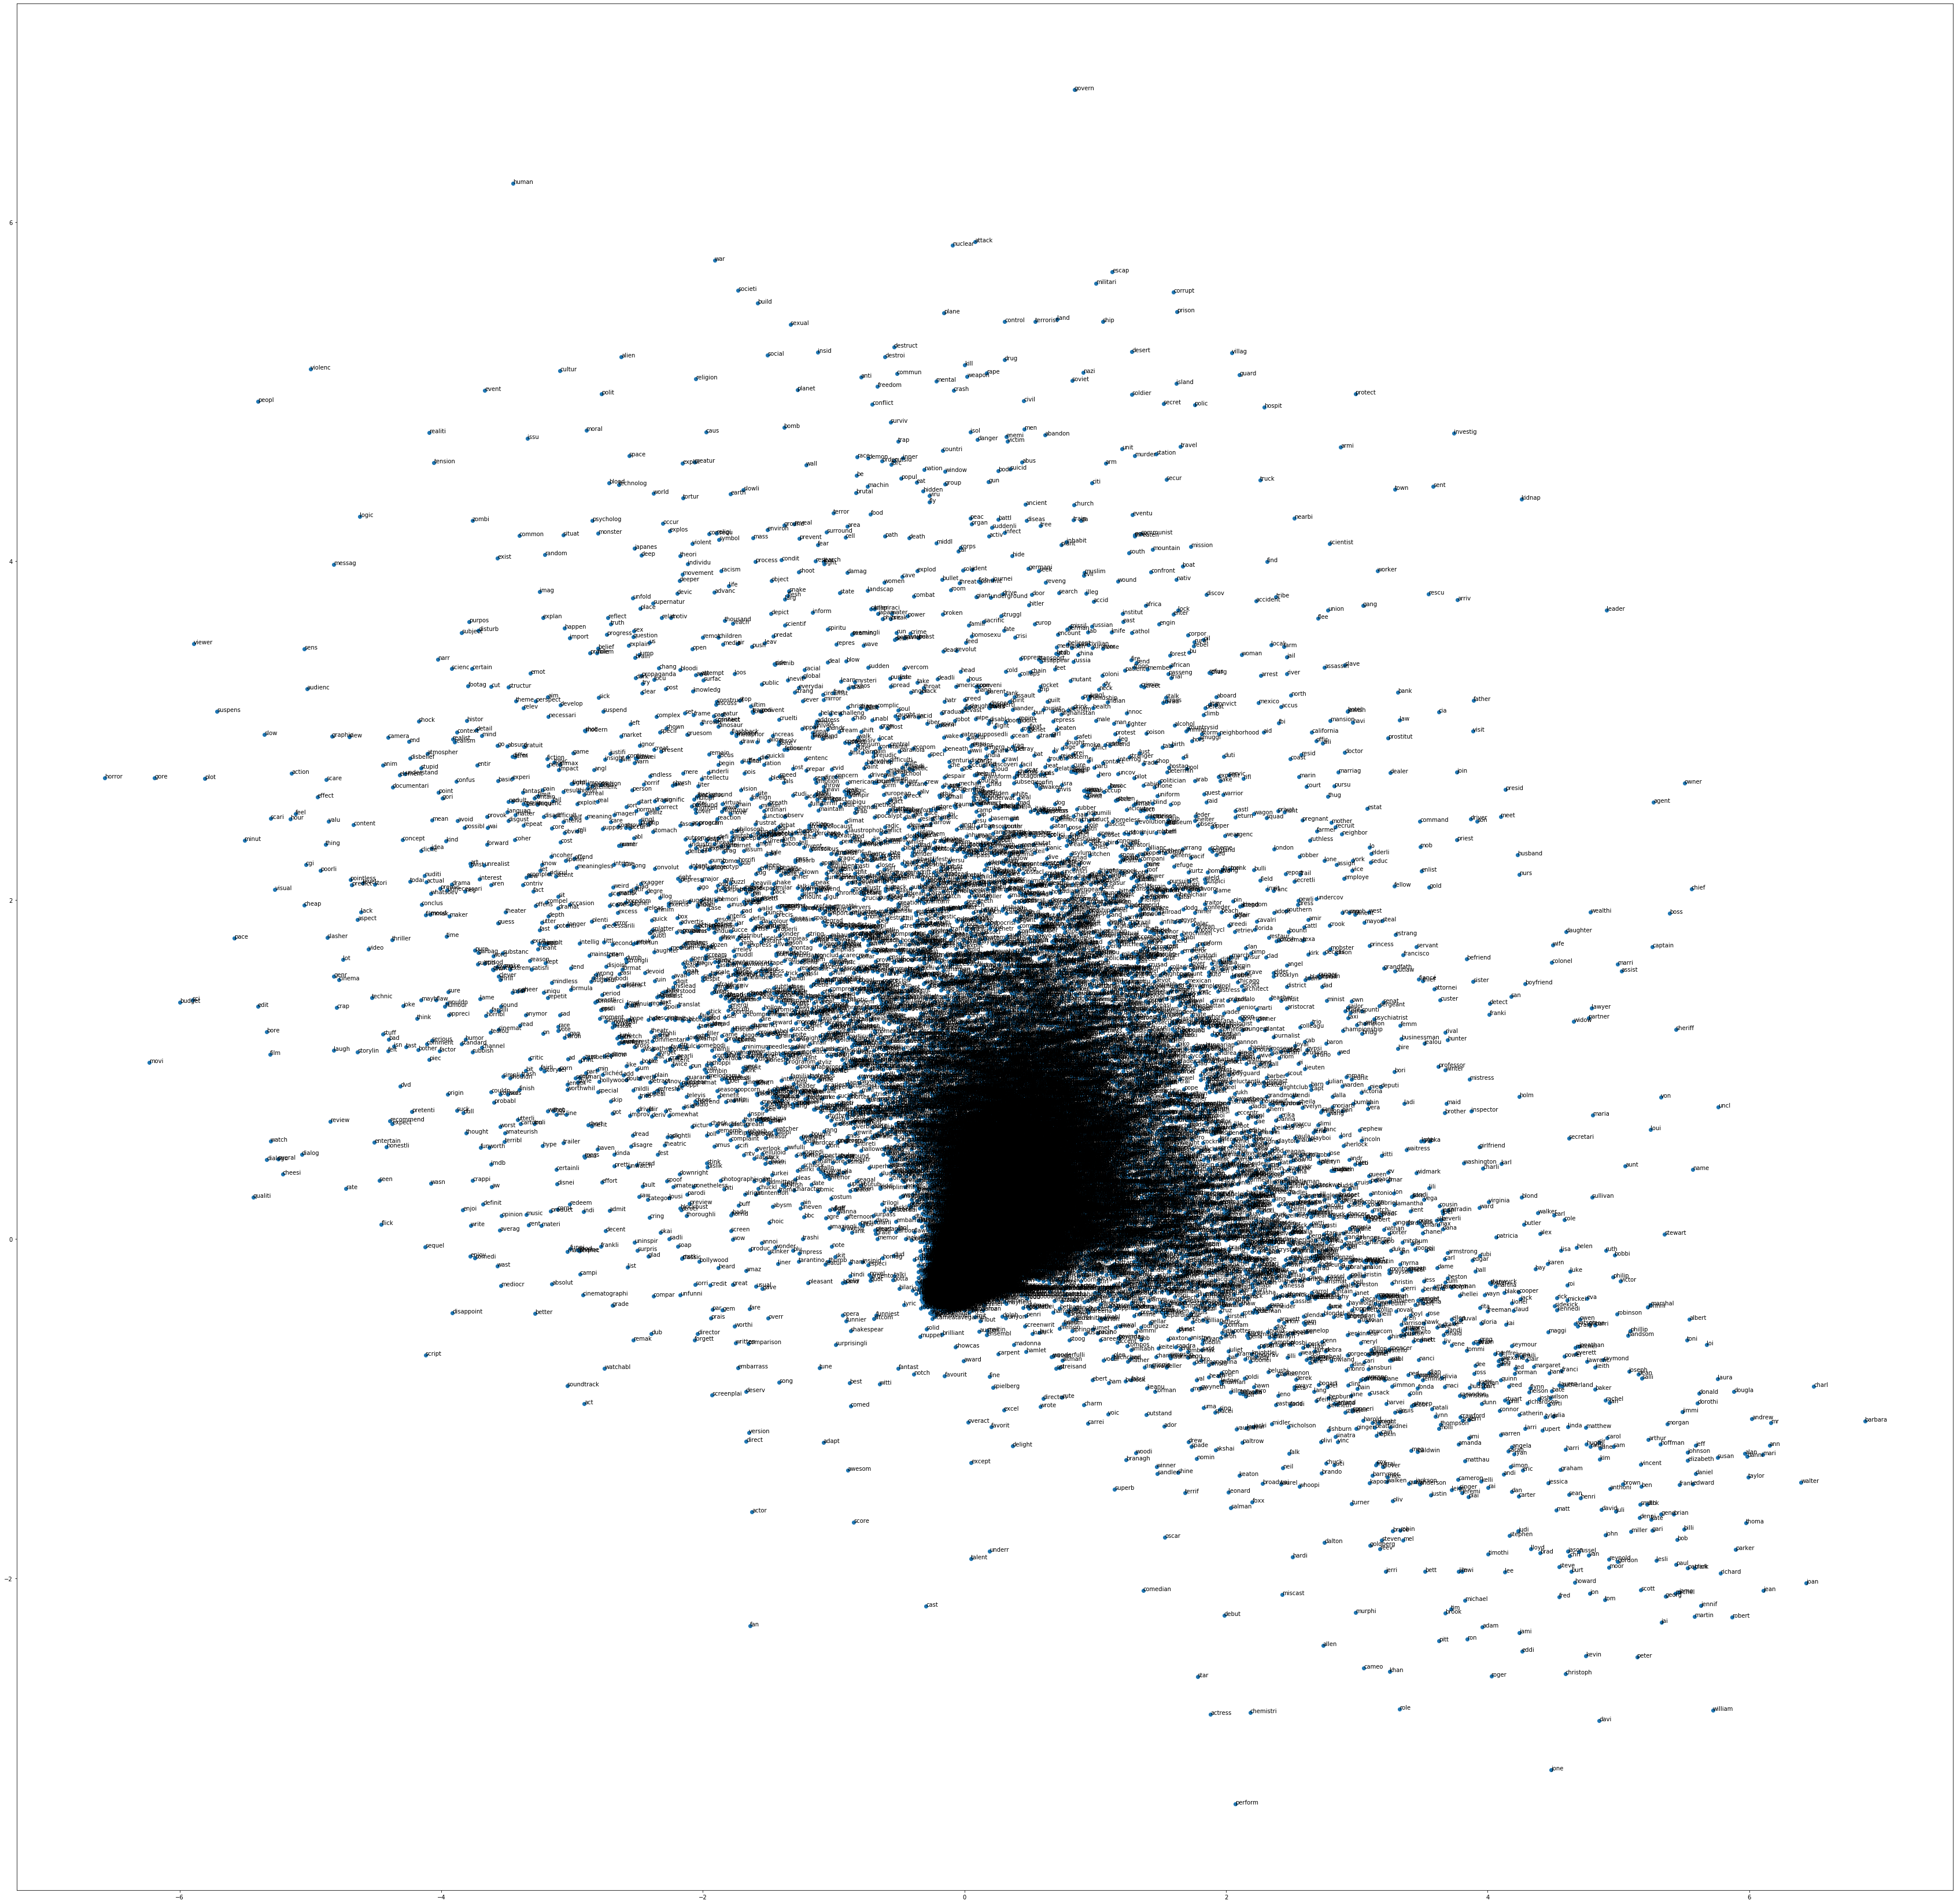

In [34]:
## PLOT WORD2VEC WORD EMBEDDINGS USING PCA

from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import Word2Vec

# load model
model = Word2Vec.load('model.bin')
print(model)
X = model[model.wv.vocab]

# fit a 2D PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
pyplot.rcParams["figure.figsize"] = (60,60)
pyplot.plot([-0.1,0.1], [-0.1,0.1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [35]:
## CHECK OUT FUN RESULTS FROM WORD2VEC MODEL

print(str(model.wv.most_similar(positive = "funni", topn = 5)) + "\n") 
print(str(model.wv.most_similar(positive = "director", topn = 3)) + "\n") 
print(str(model.wv.most_similar(positive = ['food', 'bad'], topn = 3)) + "\n")
print(str(model.wv.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 3)) + "\n")


[('hilari', 0.8297262191772461), ('funnier', 0.7177248597145081), ('amus', 0.703149676322937), ('skit', 0.6782393455505371), ('chuckl', 0.6725542545318604)]

[('filmmak', 0.7250880599021912), ('cinematograph', 0.6015501022338867), ('maker', 0.600208580493927)]

[('toilet', 0.6395815014839172), ('can', 0.6100162267684937), ('clean', 0.5982718467712402)]

[('princess', 0.5859859585762024), ('queen', 0.5690448880195618), ('rice', 0.5449804663658142)]



### 3.3 Word2Vec: Effects of Downsampling

C:\Users\hueyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hueyq\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hueyq\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


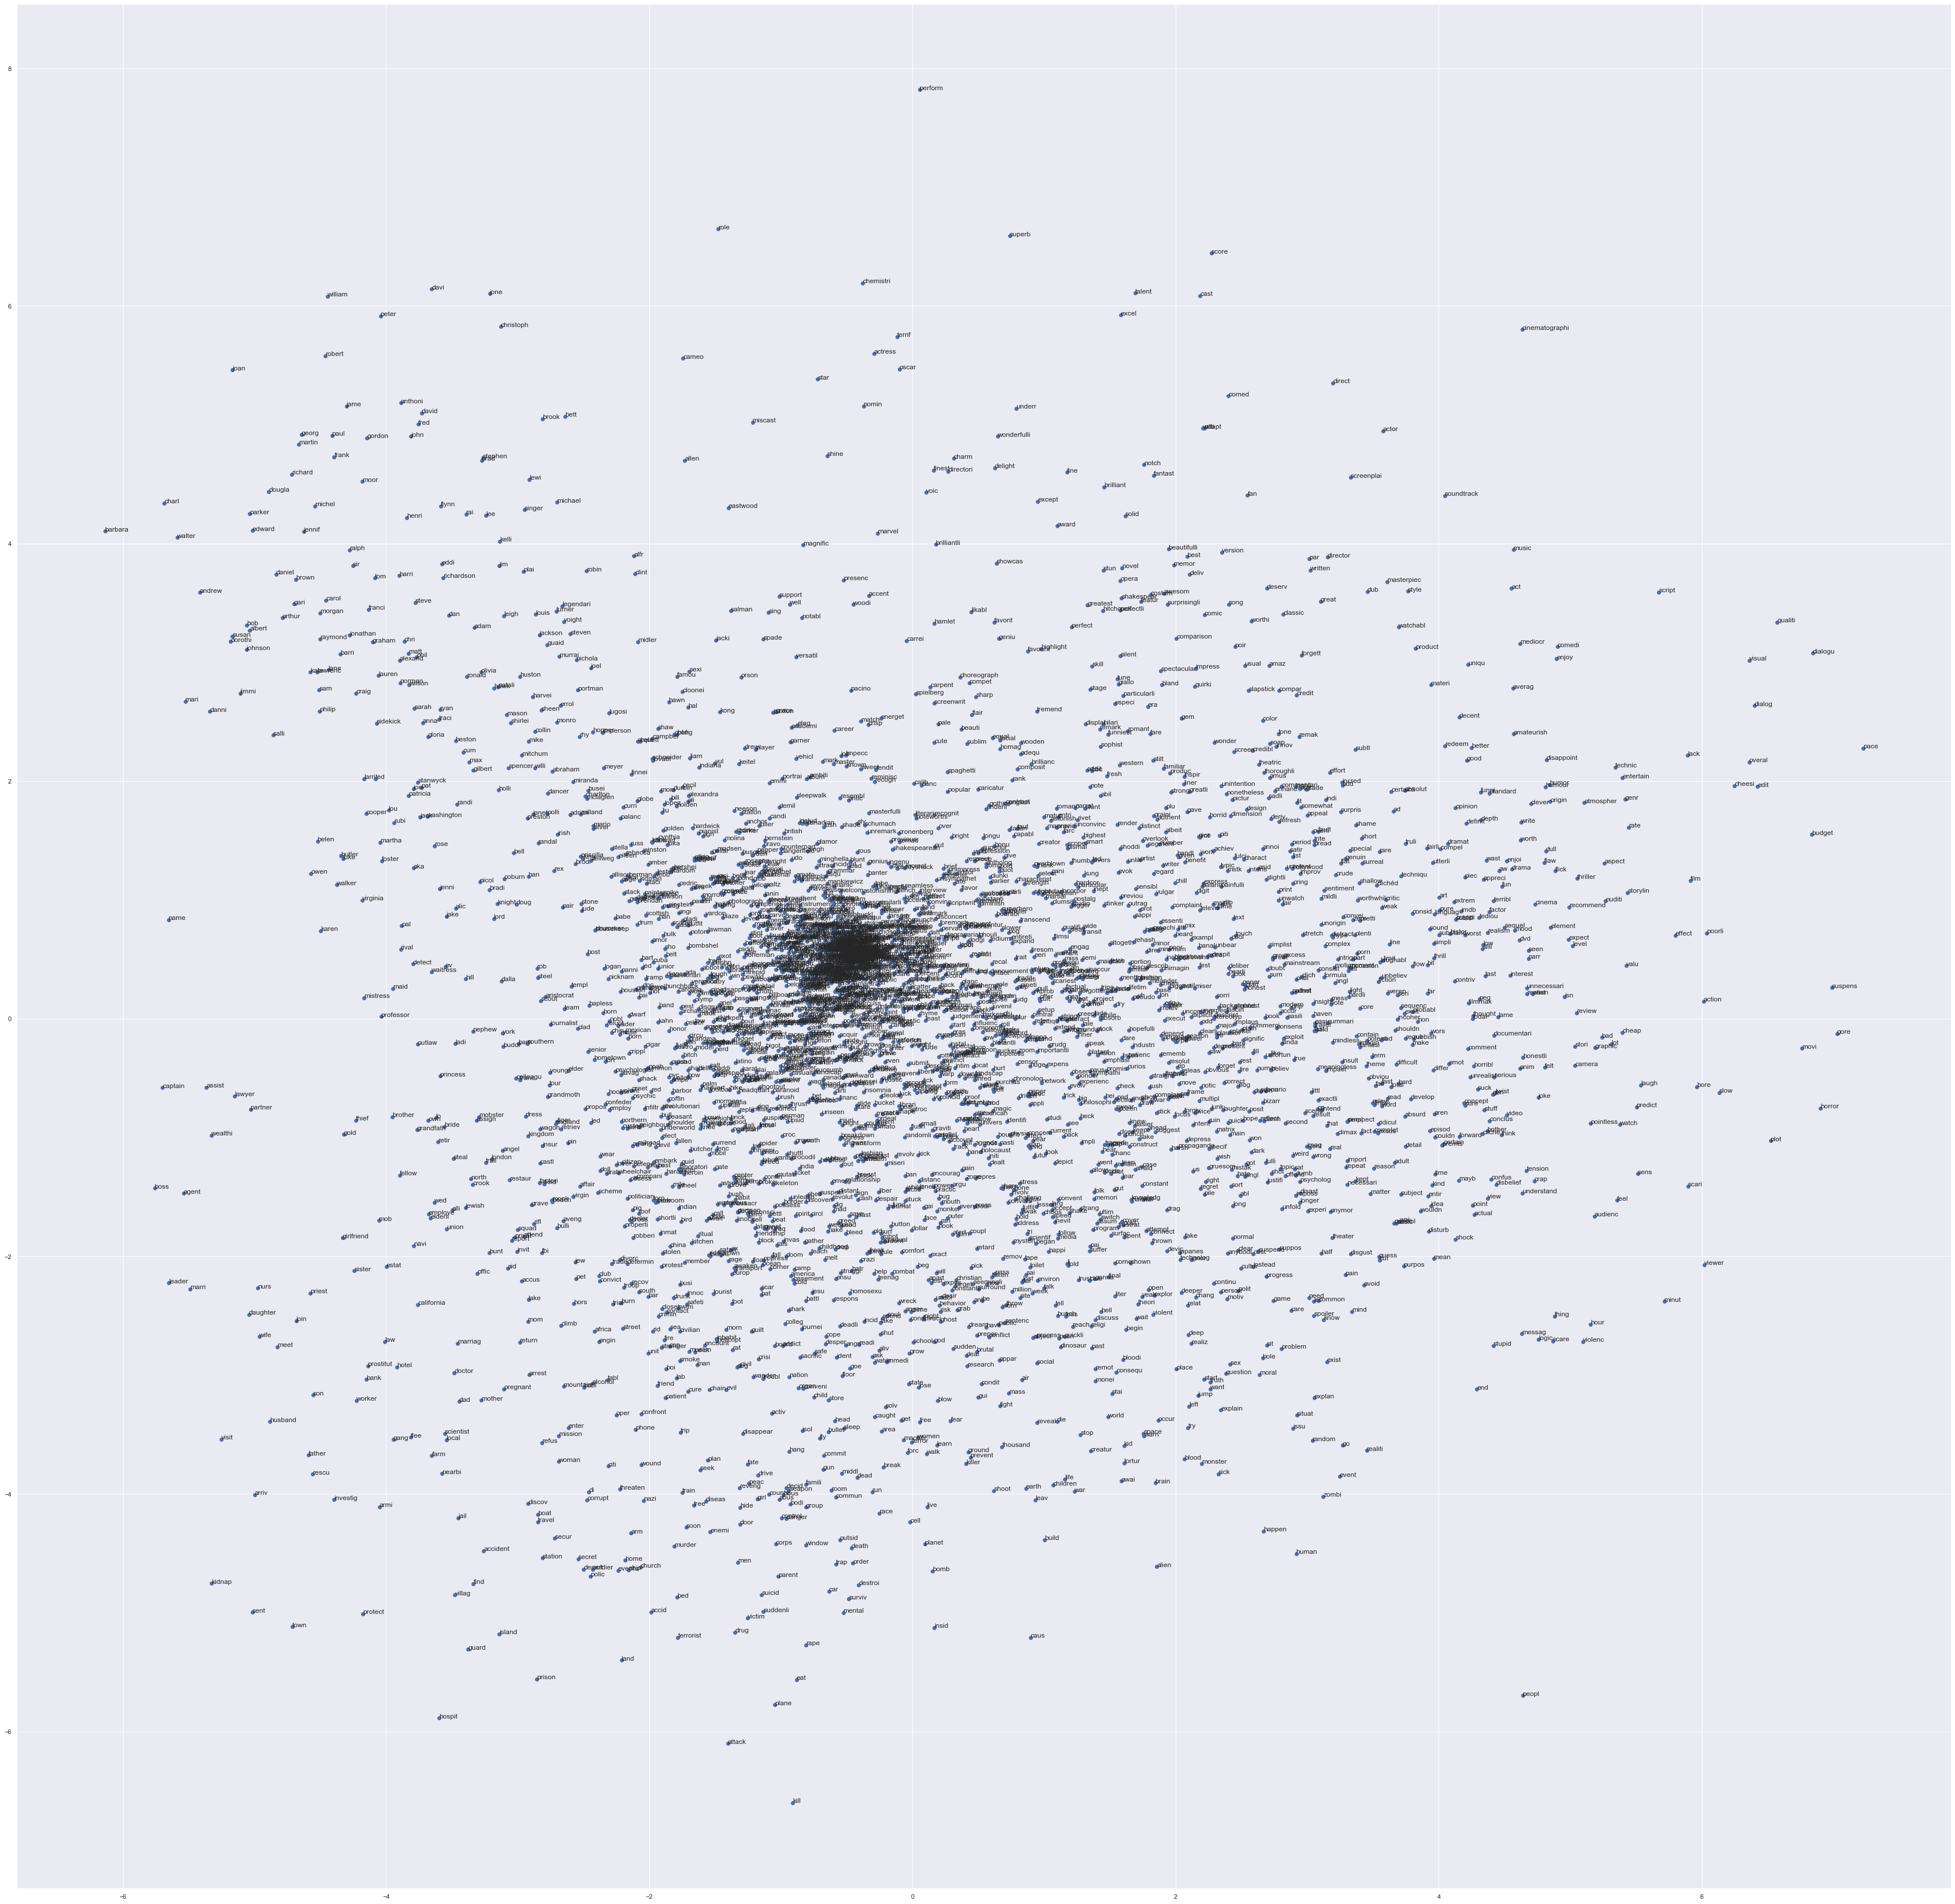

[('role', 0.3784368634223938), ('ey', 0.3612034320831299), ('year', 0.3404123783111572), ('good', 0.3375547528266907), ('unwittingli', 0.3362599015235901)]

[('film', 0.45456820726394653), ('love', 0.424347460269928), ('barn', 0.39827921986579895)]

[('trivial', 0.3609691262245178), ('shack', 0.3253280818462372), ('ring', 0.3194538354873657)]



In [37]:
## WORD2VEC WITH MUCH LESS DATA

sentListSmall = []
for review in df[:100]["review"]:
    sentencesSmall = nltk.sent_tokenize(review)
    str1 = ''.join(sentencesSmall)
    sentencesSmall = preprocess_string(str1)
    sentListSmall.append(sentencesSmall)

modelSmall = Word2Vec(sentListSmall, size=100,  min_count=1) 
XSmall = model[modelSmall.wv.vocab]

# fit a 2D PCA model to the vectors
pcaSmall = PCA(n_components=2)
resultSmall = pcaSmall.fit_transform(XSmall)

# create a scatter plot of the projection
pyplot.scatter(resultSmall[:, 0], resultSmall[:, 1])
pyplot.rcParams["figure.figsize"] = (60,60)
# pyplot.plot([-0.1,0.1], [-0.1,0.1])
wordsSmall = list(modelSmall.wv.vocab)
for i, word in enumerate(wordsSmall):
    pyplot.annotate(word, xy=(resultSmall[i, 0], resultSmall[i, 1]))
pyplot.show()

print(str(modelSmall.wv.most_similar(positive = "funni", topn = 5)) + "\n") 
print(str(modelSmall.wv.most_similar(positive = "director", topn = 3)) + "\n") 
#print(str(modelSmall.wv.most_similar(positive = ['food', 'bad'], topn = 3)) + "\n")
print(str(modelSmall.wv.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 3)) + "\n")

 ### 3.1 Word2Vec: Neural Net

### 3.2 Word2Vec: Support Vector Machine (SVM)

# 4. Learn Word Embeddings with Continuous Bag of Words

### 4.1 CBOW: Neural Net

### 4.2 CBOW: Support Vector Machine (SVM)

# 5. Learn Word Embeddings with Skip Gram

### 5.1 Skip Gram: Neural Net

### 5.2 Skip Gram: Support Vector Machine (SVM)

# 6. Compare All Models

In [13]:
print("Naive Bayes accuracy: " + str(accuracy_score_nb))
print("Naive Bayes Cross Validation accuracy: " + str(nb_xval_scores.mean()))
print("Logistic Regression accuracy: " + str(accuracy_score_lr))
#print("Logistic Regression accuracy: " + str(lr_xval_scores))
print("Word2Vec Neural Net accuracy: " + str())
print("Word2Vec SVM accuracy: " + str())
print("CBOW Neural Net accuracy: " + str())
print("CBOW SVM accuracy: " + str())
print("Skip Gram Neural Net accuracy: " + str())
print("Skip Gram SVM accuracy: " + str())

Naive Bayes accuracy: 0.8415
Naive Bayes Cross Validation accuracy: 0.8499000000000001
Logistic Regression accuracy: 0.8816
Word2Vec Neural Net accuracy: 
Word2Vec SVM accuracy: 
CBOW Neural Net accuracy: 
CBOW SVM accuracy: 
Skip Gram Neural Net accuracy: 
Skip Gram SVM accuracy: 
